## 09 Use and remove Trend.

As we know `Trend` is a continued increase or decrease in the series over time. Could be interesting identifying, modeling and even remove trend information from our dataset.

We will learn:

 - Types of trends and identify them.
 - Implement different methods to remove trends.
 - Model a linear trend and remove it from example(sales) dataset.
 
 In general a systematic change in a time series that does not appear to be periodic is know as a trend. Identifying and understanding trend information can aid in improving model performance.
 
 Identify trend or the absence of it, could provide us the following advantages.
 
 - **Faster Modeling:** knoledge of a trend or lack of it can suggest methods and make model selection more efficient.
 - **Simpler Problem:** Perhaps we can correct or remove the trend to simplify modeling and improve model performance.
 - **Mode Data:** Perhaps we can use trend infomration, directly or as summary to provide additional information to the model and improve model performance.

### 9.1 Types of Trends

There are all kinds of trends. Two general clases that we may think about are:

 `Deterministic Trends:` Theres are trends that consistenly incres or decrease.  
  `Stochastic Trends:` These are trends taht incres and decrease inconsistenly.  
 

*Deterministic: system with no randomness.
*Stochastic: system has a random probability distribution or pattern 

 Trends can be too global(apply the whole TS) or local, (apply to parts)

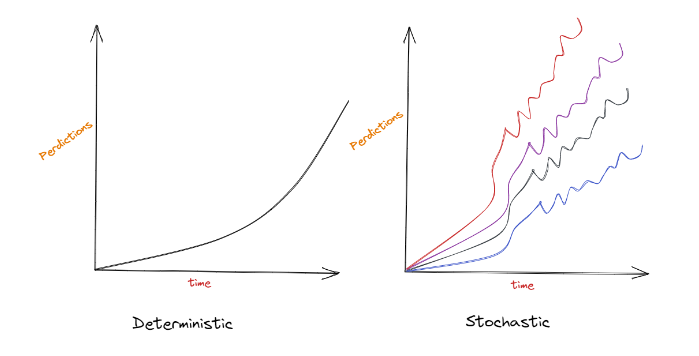


**Identify a trend** We can plot a our TS data to see if a obvious trend appear, that problem is that often is a subjetive process.

**Remove trend** A TS with trend is called non-stationary, the trend can be identify and remove from a DS if needed.

**Using TS trend in ML** Adding or removing the trend coul be potentially profitable.

### 9.2 Detrend by Differencing

The simples methods to detrend a TS is by differencing:
new_value_serie = value(t) - value(t-1)


In [10]:
import pandas as pd
import os
from matplotlib import pyplot
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [3]:

data = os.environ.get('data') # avoid personal information in the notebook
data_path = data + '\\01_TimeSeries\\5-shampoo-sales.csv'

series = pd.read_csv(data_path, header=0, index_col=0, parse_dates=True, squeeze=True)

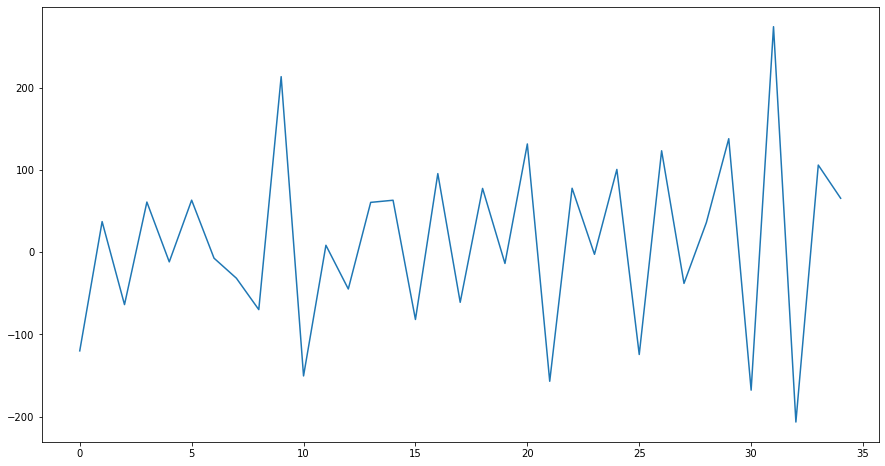

In [4]:
# detrend dataset
pyplot.rcParams['figure.figsize'] = [15, 8]
X = series.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()


### 9.3 Detrend by Model Fitting

In [14]:
# fit linear model
X = [i for i in range(0, len(series))]
print(X[:3])
X = np.reshape(X, (len(X), 1)) # X will be the observations. obs1, obs2.. and ist just cause you need something for your Y
print(X[:3])
y = series.values
print(y[:3])
model = LinearRegression()
model.fit(X, y)
# calcualte trend
trend = model.predict(X)

[0, 1, 2]
[[0]
 [1]
 [2]]
[266.  145.9 183.1]


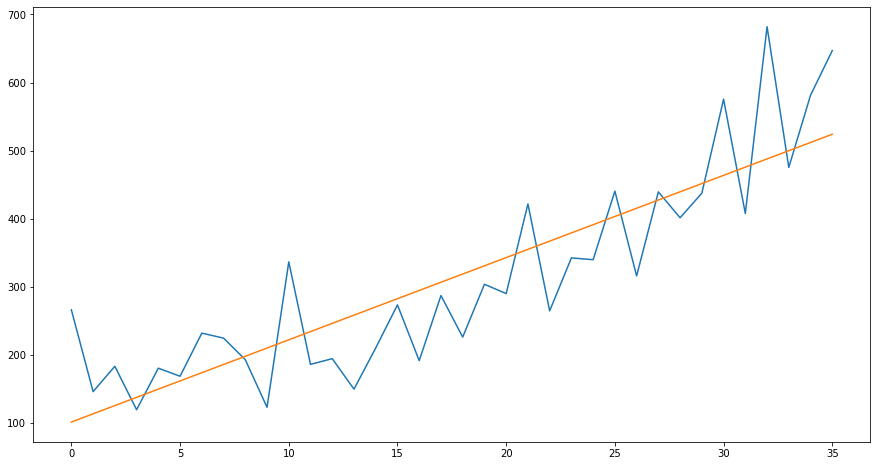

In [15]:
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()


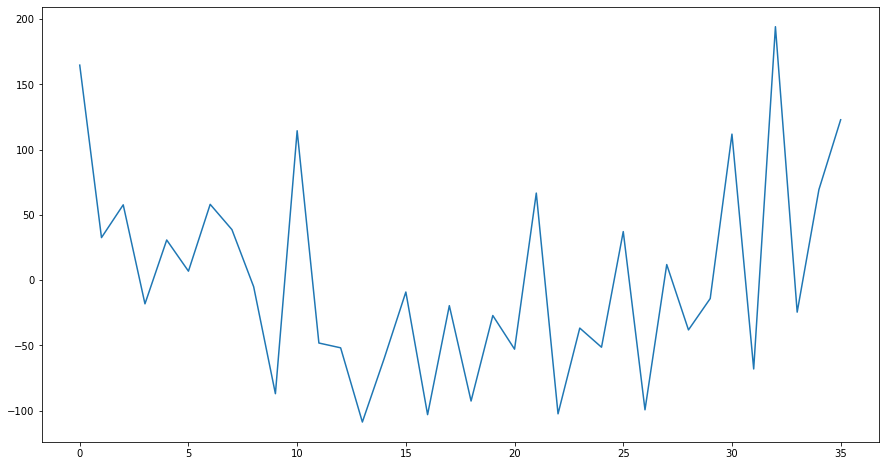

In [17]:
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

#### End.